<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №4

Загрузить датасет на выбор.
Например, датасет о футболистах (для тех, кто интересуется футболом): https://www.kaggle.com/karangadiya/fifa19

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [3]:
data=pd.read_csv('fifa.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
data['Weak Foot'].value_counts()

3.0    11349
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Сделать график histogram для данных таблицы. К какому распределению можно отнести эти графики?

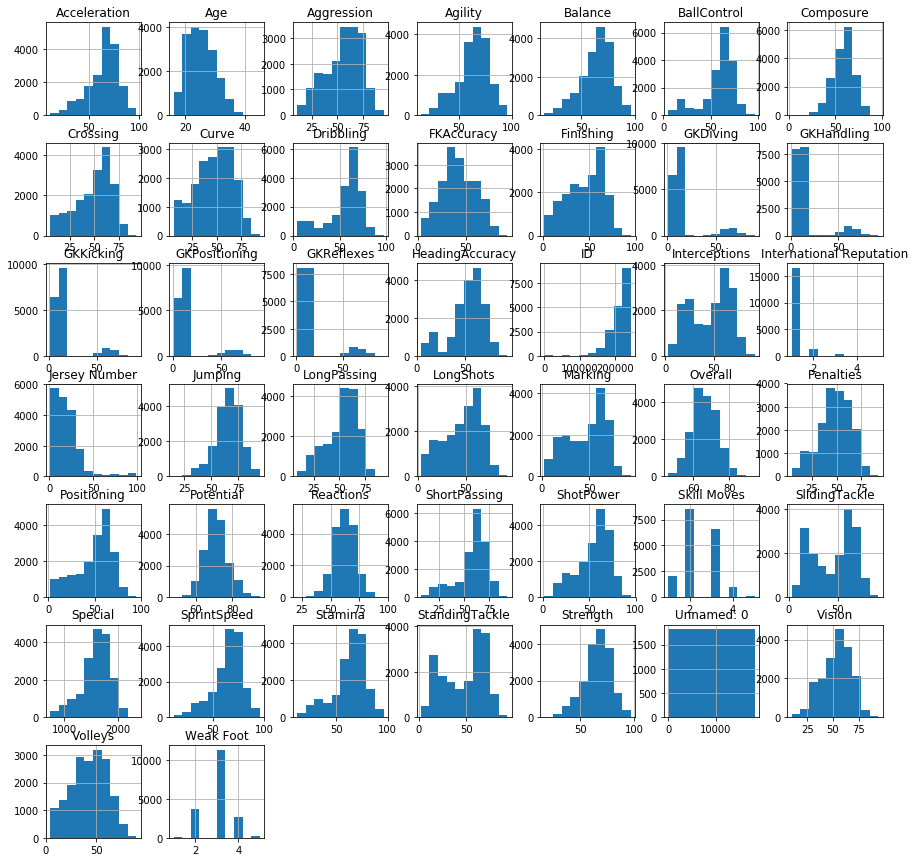

In [6]:
data.hist(figsize=(15,15))
plt.show()

In [ ]:
В основном графики нормального распределения. 
Отличается Unnamed - равномерное, т.к. это просто порядковый номер в таблице
Столбцы 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes' больше похоже на логнормальное распределение


Найти в датасете переменную, которую можно предсказать с помощью моделей машинного обучения (например, Overall - рейтинг футболиста в датасете о футболистах).

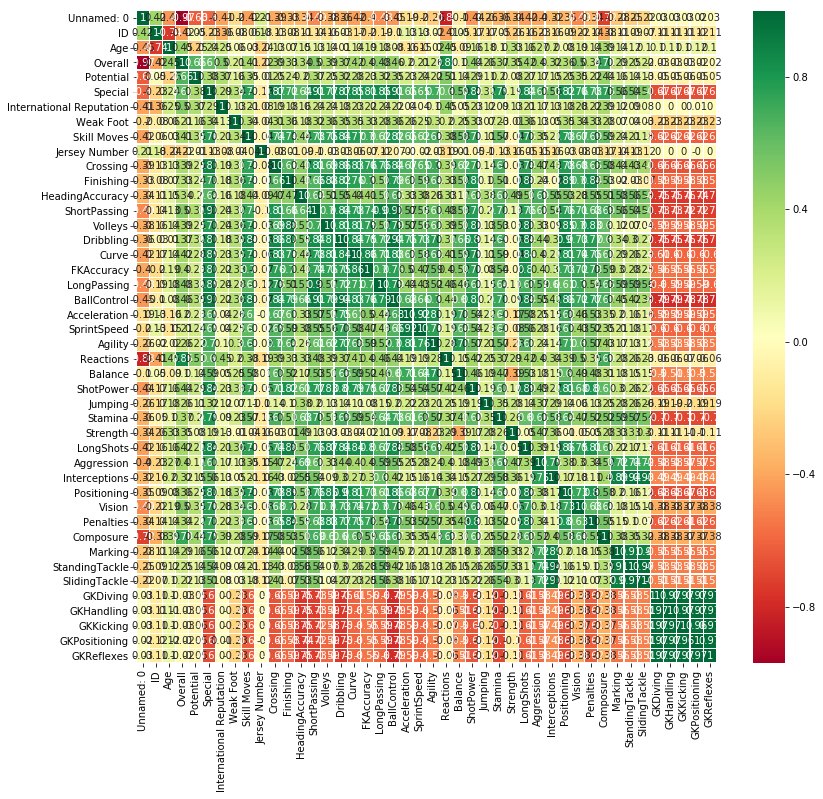

In [9]:
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

Эта переменная является target value, или значение, которые мы хотим предсказать. Построить корреляцию данной переменной с другими колонками.  Сделать вывод о том, какие значения коррелируют с данной target value

Найти в датасете классификационные данные (например, в датасете о футболистах, это 
Nationality). Посмотреть количество элементов в каждом классе. Есть ли в данных проблема несбалансированности классов? Что мы можем сделать, чтобы сделать классы сбалансированными? (на эту тему можно почитать статью https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/). Применить методы (если получится) для балансировки данных.

Сгенерировать из классов (например, колонки  Preferred Foot,  Body Type из датасета о футболистах) вектор one-hot encoding. Для чего мы переводим классы в вектора? 

Допустим, мы хотим предсказать зарплату футболиста, основываясь на всех данных в таблице. Какие колонки можно выбрать для линейной регресси? Почему (посмотреть матрицу корреляций)? Написать модель линейной регрессии.

Удалить с помощью регулярного выражения из колонки Name слова с точками (A. Griezmann -> Griezmann). После этого посмотреть, какое имя встречается в таблице чаще всего?

Допустим, мы хотим предсказать International Reputation основываясь на значении Value. Имеют ли данные значения корреляцию? Показать графически и математически. 

Сравнить свой анализ с ноутбуком из каггл. Например, https://www.kaggle.com/nitinchan/fifa19-analysis-viz-recommendation. Что можно добавить к анализу своей работы?